#  Analysis and Comparison of Classification Models on Breast Cancer Dataset  


# Introduction
This report briefly overviews the breast cancer wisconsin dataset, as well as the classification models used to predict the diagnosis of each sample. It also addresses the importance of feature selection and parameters tuning on these models. It illustrates the confusion matrix and the learning curve of each classifier in order to make a comparison. By the end of the report, a synthetic dataset was generated so that we can see how these models would perform on noisy data and how the decision boundary would look like.  

## The breast cancer Wisconsin (diagnostic) data set

Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this builds a model that can classify a breast cancer tumor using two training classification:

1= Malignant (Cancerous)

0= Benign (Not Cancerous)

Therfore, the goal is to classify whether the breast cancer is benign or malignant.

The Breast Cancer datasets is available on UCI machine learning repository. The dataset contains 569 samples of malignant and benign tumor cells.

# Importing Required Libraries 
The following libraries might need to be installed:

mlxtend using: pip install mlxtend

yellowbrick using: pip install yellowbrick

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, ShuffleSplit
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import mlxtend
from mlxtend.plotting import plot_confusion_matrix, plot_learning_curves
from yellowbrick.contrib.classifier import DecisionViz

D:\School\python\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data overview and preprocessing
Before implementing machine learning algorithms the data should be formatted. Here, I have separated the classes (targets) which is the diagnosis from the datasets and then I had to encode the targets where each M will be represented by 1 and each B will be represented by 0. Moreover, the data was normalized since most machine learning algorithms don't perform well when the numerical input values have very different scales. To rescale the data, we subtract the minimum from every value and divide by the maximum minus the minimum. For this purpose, I have used MinMaxScaler from sklearn. Finally, I had to split the data into training and testing sets, my testing sets will be 33% of the whole dataset. 

In [3]:
#read data
data= pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


B    357
M    212
Name: diagnosis, dtype: int64


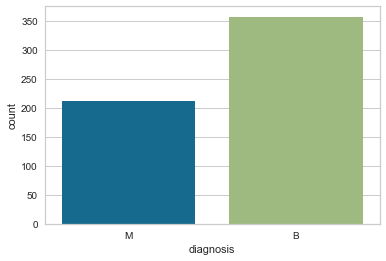

In [3]:
# Print target column's values
# Visualize number of target (M and B's)
sns.countplot(data['diagnosis'])
print(data.diagnosis.value_counts())

In [4]:
# Drop id and Unnamed: 32 from data. 
data.drop(['id', 'Unnamed: 32'], inplace=True, axis=1)
#1 for M and 0 for B
data=data.replace('M',1)
data=data.replace('B',0)
#normalize data
scaler = MinMaxScaler()
scaler.fit(data)
scaler.transform(data)
#split into x and y 
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']
#pd.plotting.scatter_matrix(data, figsize=(40,40))

#splitting into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Training Classifiers
Here, multiple classifiers have been trained on the data just to see which ones perform better (based on the accuracy score) before optimizing them. Some were removed as well which performed similarly. A brief overview of each model used have been also provided.

Accuracy score is calculated as the following:

###### acc = Number of correct predictions/Total number of predictions

Its value is between 0 and 1 where 1 is the best it could be.

## Decision Trees
A decision tree is trained (or grown) by recursively partitioning the input data in a way which tends to group instances with the same class label together. At each step a new node in the tree is added by selecting the most informative feature and creating subtrees for each posssible value of this feature. To determine the most informative feature, measures such as entropy and information gain or the gini index are used.


Scikit learn implements decision tree learning in the DecisionTreeClassifier. This algorithm is an optimised version of the CART algorithm; however, scikit learn implementation does not support categorical variables for now.



CART Algorithm
aka Classification and Regression Tree creates a binary tree, meaning each non-terminal node has two child nodes. This is in contrast with general tree-based methods that may allow multiple child nodes. One big appeal CART has is that the decision process is very similar to how we humans make decisions. Therefore, it is easy to understand and accept the results coming from the tree-style decision process. Another very appealing aspect of CART is that, unlike many linear combination methods like logistic regression or support vector machine, it allows diverse types of input data. So the input data can mix numerical variables and categorical variables.

Scikit learn DecisionTreeClassifier applies two different functions to measure the quality of a split, gini impurity is the default while the other is entropy for information gain. This is one of the most important parameters in DecisionTreeClassifier. 

Gini:


            
##### G(k) =  Σ P(i) * (1 - P(i))

for i=1,.....,J
         
         
Where P(i) is the probability of a certain classification i, per the training data set.


Entropy:


       
##### B(k) = -Σ P(k_d) * log2(P(k_d))



Where k is an attribute of the decision tree.

### Running Decision Tree Classifier
I have used Scikit learn DecisionTreeClassifier. In order to run it, we might have to specify the criterion of how we want the split to occur as explained above. Other important parameters are max_depth which indicates how deep the tree can be, min_samples_split which represents the minimum number of samples required to split an internal node, min_samples_leaf which is the minimum number of samples required to be at a leaf node and max_features which represents the number of features to consider when looking for the best split.

DecisionTreeClassifier takes as input two arrays: the data matrix X and the class labels y.
Learning is done as follows:

> from sklearn.tree import DecisionTreeClassifier

> clf = DecisionTreeClassifier()

> clf.fit(X, y)

After the learning process, the model can then be used to predict ynew for xnew

> clf.predict(xnew)


In [5]:
#create a tree model
tree = DecisionTreeClassifier()
#train the decision tree on training set
tree=tree.fit(X_train,y_train)
#use trained model to make predictions on test data
predictions=tree.predict(X_test)
#use the score function to determine classification accuracy on the test set
print('classification accuracy: ' +repr(tree.score(X_test,y_test)))

classification accuracy: 0.898936170212766


## Random Forest
Before explaining what random forest is we should explain ensemble algorithms; 
Ensemble learning is an easy way to increase performance and reduce the variance issues trees can have by combining the outputs of multiple models. When combining multiple decision trees, this is typically referred to as a (random) forest. In order to create different models that each contribute to the ensemble, some randomization in the training process is needed. In the case of decison trees, this randomization is obtained by training on randomized subsets of the training data and/or by randomizing splitting feature in the tree nodes. This way, a very large number of different trees can be trained. A prediction is then obtained by letting each tree vote on the class of an instance.

### Running Random Forest Classifier
I have used Scikit learn RandomForestClassifier. In order to run it, we might have to specify the n_estimators which is the number of trees we want to build before taking the maximum voting or averages of predictions, A higher n_estimators gives a better performance but makes the code slower, and as in decision trees, the criterion (gini or entropy), max_features which is the maximum number of features Random Forest is allowed to try in the individual tree and min_sample_leaf a smaller leaf makes the model more prone to capturing noise in train data.

RandomForestClassifier takes as input two arrays: the data matrix X and the class labels y. 
Learning is done as follows:

>from sklearn.ensemble import RandomForestClassifier

>clf = RandomForestClassifier()

>clf.fit(X, y)

After the learning process, the model can then be used to predict ynew for xnew

>clf.predict(xnew)

In [6]:
#create a random forest model
rf = RandomForestClassifier()
#train the rf on training set
rf.fit(X_train,y_train)
#use trained model to make predictions on test data
predictions= rf.predict(X_test)
#use the score function to determine classification accuracy on the test set
print('classification accuracy: ' +repr(rf.score(X_test,y_test)))

classification accuracy: 0.9680851063829787


## K- Nearest Neighbor

It is an algorithm that is used for classification and regression problems, in this case it's classification. The algorithm classifies a data point based on how its neigbors are classified, it measures the distance from the new data point to all other data points that are already classified then it gets the k smaller distances, after that it checks the list of classes with the shortest distance and counts how many times each class appeared, the new data will be classified based on the class that appeared the most. The most commonly used functions to measure the distance are:

 Euclidean                                                            
             
> $$d =   \sqrt  {Σ (Xi - Yi)^2} $$                        for i= 1,....,k

 Hamming
> $$d =   \  {Σ |Xi - Yi|} $$                              for i= 1,....,k

> X == Y -> d = 0

> X != Y -> d = 1


Where Euclidean distance is moslty used for continuous variables and hamming is used for categorical variables. 

### Running K- Nearest Neighbor Classifier
I have used Scikit learn KNeighborsClassifier. In order to run it, we might have to specify the n_neighbor (k) which is the number of neighbors, metric which is the distance function to be used and weights which represent the weight of the points in each neighborhood. 

KNeighborsClassifier takes as input two arrays: the data matrix X and the class labels y. 

Learning is done as follows:

>from sklearn.neighbors import KNeighborsClassifier

>clf = KNeighborsClassifier()

>clf.fit(X, y)

After the learning process, the model can then be used to predict ynew for xnew

>clf.predict(xnew)                                                            

In [7]:
#create a knn model
knn = KNeighborsClassifier()
#train the knn on training set
knn.fit(X_train,y_train)
#use trained model to make predictions on test data
predictions= knn.predict(X_test)
#use the score function to determine classification accuracy on the test set
print('classification accuracy: ' +repr(knn.score(X_test,y_test)))

classification accuracy: 0.9521276595744681


# Feature Selection

Feature selection aids in creating an accurate predictive model, it helps by choosing the features that will give better accuracy therefore it requires less data which decreases the training time and the complexity of the model. Here, two methods were applied on Random Forest in order to see which one will choose the most important features that will increase the models accuracy score. Note that both of these methods choose the features based on their correlation with the output, however, the first one uses (corrwith()) and then the features are sorted based on their scores while the second method uses SelectKBest(score_func=chi2) and then again the features are sorted. They give a different result that's why I kept both of them.


### Correlation with the output
Performs feature selection by keeping the variables most correlated with the output. Then the data with the best features is splitted into X (features) and y (targets) which is splitted again into training and testing sets in order to be fitted to the model and by the end the accuracy score is calculated. 

In [8]:
#best features based on correlation with target
ft= X.corrwith(y)
ftbest= ft.nlargest(30)
worst= ftbest[11:]
worst = worst.index
ndata=data.drop(worst,axis=1)
#keeping data with best 10 features
nX= ndata.drop(['diagnosis'], axis=1)
ny=ndata.diagnosis
# Split into training and test sets
nX_train, nX_test, ny_train, ny_test = train_test_split(nX, ny, test_size=0.33, random_state=42)

In [9]:
#create a random forest model
rf = RandomForestClassifier()
#train the rf on training set
rf.fit(nX_train,ny_train)
#use trained model to make predictions on test data
predictions= rf.predict(nX_test)
#use the score function to determine classification accuracy on the test set
print('classification accuracy: ' +repr(rf.score(nX_test,ny_test)))

classification accuracy: 0.9521276595744681


### Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable. I have used SelectKBest from scikit-learn library to select the best features. Then similarly to the previous method the data with the best features is kept and splitted in order for it to be used on the model and lastly the accuracy score is calculated.

In [10]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
#print(featureScores.nlargest(31,'Score'))  #print all features
allfeatures=featureScores.nlargest(31,'Score')
badones=allfeatures[11:]
badcols= badones['features'].values.tolist()
#keeping 10 best features
newdata=data.drop(badcols,axis=1)
X= newdata.drop(['diagnosis'], axis=1)
y=newdata.diagnosis
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
#create a random forest model
rf = RandomForestClassifier()
#train the rf on training set
rf.fit(X_train,y_train)
#use trained model to make predictions on test data
predictions= rf.predict(X_test)
#use the score function to determine classification accuracy on the test set
print('classification accuracy: ' +repr(rf.score(X_test,y_test)))

classification accuracy: 0.9787234042553191


We can see that the accuracy score of the random forest has decreased after the first method however it increased by around 0.01 after applying the second method.

# Optimization and Validation
Since the accuracy of Univariate Selection was a bit higher than my first method, I have decided to keep the top 10 features that were chosen by it and based on them I will be optimizing my 3 models.

I have tried to tune the parameters for each of the classifiers, I couldn't use grid seach since it's very slow which is nromal since it performs an exhaustive search over the specified parameter values for an estimator. However, I used randomized search which was very slow as well but I could use it on the DecisionTreeClassifier. In randomized search not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.

The in sample error and out sample error was calculated for each model which is done by calculating the accuracy score on the training data (for in sample error)and test data (for out sample error) and then subtracting each of them from 1.

k-fold cross validation with k=10 has been applied on each of the models, which means the dataset will be shuffled and splitted into 10 groups. One group will be held as a test set and the rest will be for training, then in this case the random forest will be fitted on these 9 groups of training sets and evaluated on the remaining test set. The same will occure until we get 10 different scores. I have printed the mean score of the cross validation which will show how each classifier will perfrom on unseen data. 


Furthermore, the confusion matrix was calculated for each model which is a useful table that presents both the class distribution in the data and the classifiers predicted class distribution with a breakdown of error types, since in case of cancer prediction it's important to know the True positives, True negatives, False positives and False negatives.

In [21]:
#create a random forest model 
rf = RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=1000,min_samples_leaf=7)
#train the rf on training set
rf.fit(X_train,y_train)
#use trained model to make predictions on test data
rf_predictions= rf.predict(X_test)
#use the score function to determine classification accuracy on the train set:
print('Training classification accuracy: ' +repr(rf.score(X_train,y_train)))
training_error_rf=1-rf.score(X_train,y_train)
print('In-sample error: %.3f ' %training_error_rf)
#use the score function to determine classification accuracy on the test set:
print('Testing classification accuracy: ' +repr(rf.score(X_test,y_test)))
test_errors_rf=1-rf.score(X_test,y_test)
print('Out-sample error: %.3f ' %test_errors_rf)
#applying 10 fold cross validation
cv = ShuffleSplit(n_splits=10)
scores_rf = cross_val_score(rf,X_test,y_test , cv=cv).mean()
print("the mean of cross validation scores: %f" %scores_rf)
#calculating the confusion matrix 
confusion_rf= confusion_matrix(y_test, rf_predictions)

Training classification accuracy: 0.9658792650918635
In-sample error: 0.034 
Testing classification accuracy: 0.973404255319149
Out-sample error: 0.027 
the mean of cross validation scores: 0.931579


In [16]:
#randomized search for best parameters
param_grid = {'max_features': ['auto', 'sqrt', 'log2'], 
              'criterion':['entropy','gini']}
rand_tree = RandomizedSearchCV(tree, param_grid, cv=cv, scoring="accuracy", n_iter=100, random_state=42)
rand_tree.fit(X_train,y_train)
print(rand_tree.best_score_)
print(rand_tree.best_estimator_)

D:\School\python\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0.9076923076923077
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [22]:
#create a tree model which uses entropy to select splitting features
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
#train the decision tree on our training set
tree=tree.fit(X_train,y_train)
#use trained model to make predictions on test data
predictions_tree=tree.predict(X_test)

#use the score function to determine classification accuracy on the train set:
print('Training classification accuracy: ' +repr(tree.score(X_train,y_train)))
training_error_tree=1-tree.score(X_train,y_train)
print('In-sample error: %.2f ' %training_error_tree)
#use the score function to determine classification accuracy (percentage correctly classified) on the test set:
print('Testing classification accuracy: ' +repr(tree.score(X_test,y_test)))
test_errors_tree=1-tree.score(X_test,y_test)
print('Out-sample error: %.2f ' %test_errors_tree)
#cross validation
scores_tree = cross_val_score(tree,X_test,y_test , cv=cv).mean()
print("the mean of cross validation scores: %f" %scores_tree)
#calculating the confusion matrix 
confusion_tree= confusion_matrix(y_test, predictions_tree)

Training classification accuracy: 1.0
In-sample error: 0.00 
Testing classification accuracy: 0.9361702127659575
Out-sample error: 0.06 
the mean of cross validation scores: 0.915789


In [23]:
#create a knn model
knn = KNeighborsClassifier(n_neighbors=11,weights='uniform',metric='euclidean')
#train the knn on training set
knn.fit(X_train,y_train)
#use trained model to make predictions on test data
predictions_knn= knn.predict(X_test)
#use the score function to determine classification accuracy on the train set:
print('Training classification accuracy: ' +repr(knn.score(X_train,y_train)))
training_error_knn=1-knn.score(X_train,y_train)
print('In-sample error: %.2f ' %training_error_knn)
#use the score function to determine classification accuracy on the test set:
print('Testing classification accuracy: ' +repr(knn.score(X_test,y_test)))
test_errors_knn=1-knn.score(X_test,y_test)
print('Out-sample error: %.2f ' %test_errors_knn)
#applying 10 fold cross validation
scores_knn = cross_val_score(knn,X_test,y_test , cv=cv).mean()
print("the mean of cross validation scores: %f" %scores_knn)
#calculating the confusion matrix 
confusion_knn= confusion_matrix(y_test, predictions_knn) 

Training classification accuracy: 0.9238845144356955
In-sample error: 0.08 
Testing classification accuracy: 0.9787234042553191
Out-sample error: 0.02 
the mean of cross validation scores: 0.952632


## Model Comparison
The models were joined with their in and out sample error as well as their cross validation score. The list was then transformed into a pandas dataframe for better visualizing as seen below. Then it is used to plot each of their performances based on cross validation score.

plot_confusion_matrix was used from mlxtend.plotting to plot the confusion matrices of the models. mlxtend needs to be installed using "pip install mlxtend" and then it should be imported. I have also used plot_learning_curves from mlxtend.plotting to plot the learning curves of the classifiers which is the best way to visualize their in sample errors and out sample errors.

In [24]:
#joining all models with some of their scores in a list
models = [('Decision Tree', training_error_tree, test_errors_tree, scores_tree),
          ('Random Forest', training_error_rf, test_errors_rf, scores_rf) ,
          ('K- Nearest Neighbor', training_error_knn, test_errors_knn, scores_knn)
         ]
#transform it to a dataframe
models_scores = pd.DataFrame(data = models, columns=['Model', 'In-sample error', 'Out-sample error', 'Cross-Validation'])
models_scores

,Model,In-sample error,Out-sample error,Cross-Validation
0,Decision Tree,0.000000,0.063830,0.915789
1,Random Forest,0.034121,0.026596,0.931579
2,K- Nearest Neighbor,0.076115,0.021277,0.952632


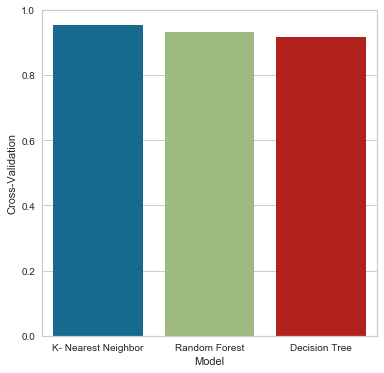

In [25]:
#plot a comparison of these models based on cv score
models_scores.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(6,6))
sns.barplot(x='Model', y='Cross-Validation', data=models_scores, ax = axe)
axe.set_xlabel('Model')
axe.set_ylabel('Cross-Validation')

plt.show()

We can see from the above table and figure how the three models compare. K-Nearest Neighbor perform the best on unseen data than Random forest and Decision Tree.

<Figure size 72x72 with 0 Axes>

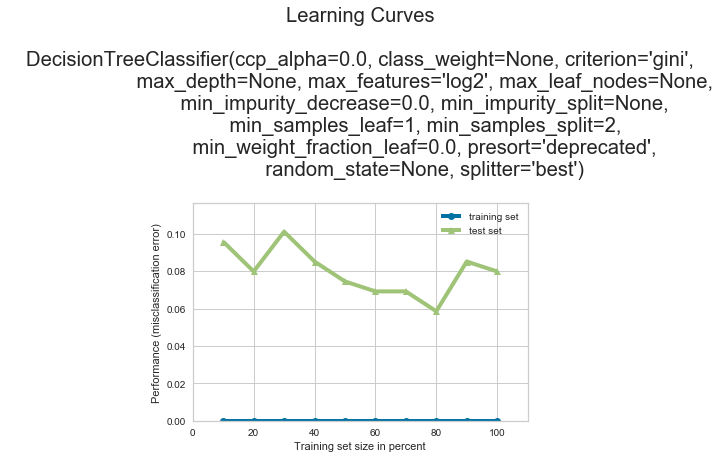

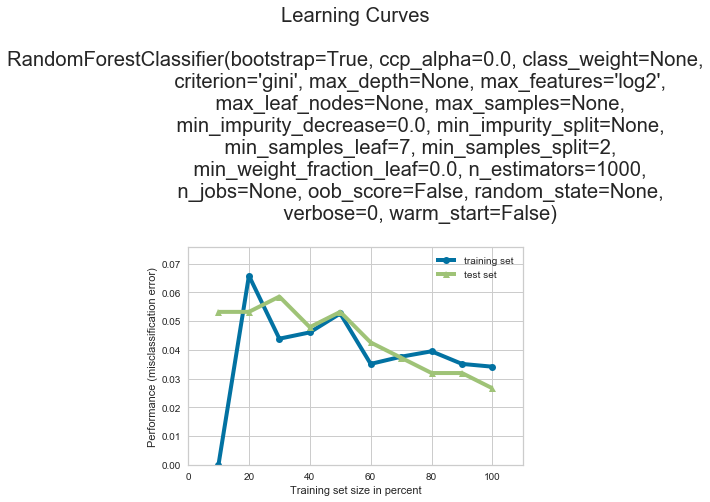

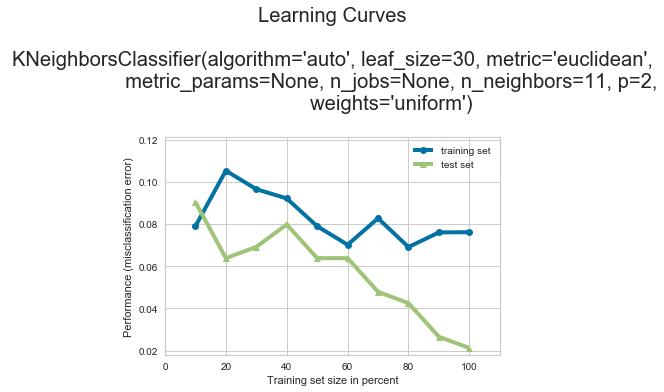

In [26]:
#plotting learning curves of the 3 models 
plt.figure(figsize=(1,1))
plt.subplots()
plot_learning_curves(X_train, y_train, X_test, y_test, tree)

plt.subplots() 
plot_learning_curves(X_train, y_train, X_test, y_test, rf)

plt.subplots()
plot_learning_curves(X_train, y_train, X_test, y_test, knn)

plt.show()

From the learning curves we can see that the Decision tree is probably over-fitting since the in sample error is always 0 while the out sample error is around 0.1. On the other hand, Random forest and K nearest neighbor (knn) learning curves are a bit harder to interpret however their out sample errors are lower than their in sample errors which means they are generalizing well. In other words, their performance is good on unseen data. 



confusion matrix of tree:


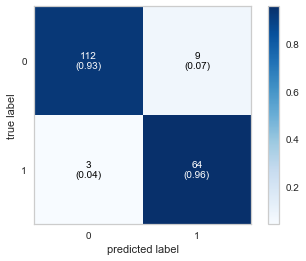

confusion matrix of rf:


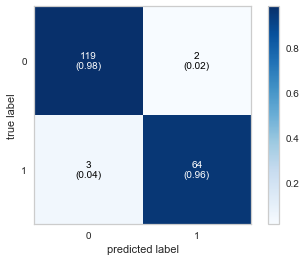

confusion matrix of knn:


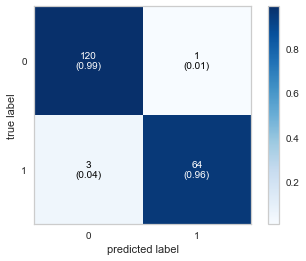

In [27]:
#plotting confusion matrices
print('confusion matrix of tree:')
plot_confusion_matrix(conf_mat=confusion_tree,show_absolute=True, show_normed=True, colorbar=True)
plt.show()
print('confusion matrix of rf:')
plot_confusion_matrix(conf_mat=confusion_rf,show_absolute=True, show_normed=True, colorbar=True)
plt.show()
print('confusion matrix of knn:')
plot_confusion_matrix(conf_mat=confusion_knn,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

The confusion matrices show almost the similar results for Nearest Neighbor and Random Forest where in random forest 98% of the True positives were predicted correctly as well as 96% of the True negatives, while in knn 99% of the True positives were predicted correctly with 96% of the True negatives. On the other hand, Decision Tree only predicted 93% of the true positives and 96% of the True negatives. 

## Synthetic Dataset Generation and Preprocessing
I have generated a synthetic dataset of 2000 samples with 2 classes which are imbalanced and 2 features, one of them is informative while the other is redundant, I have also added some noise using datasets.make_classification from scikit learn. The data points are plotted and then splitted into training and testing sets. 

The same 3 previous models have been applied on them (Decision tree, random forest and knn). 

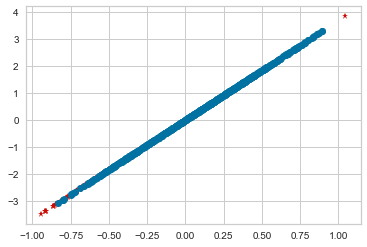

In [28]:
#classification with 2 classes, 2 features
Xs,ys = datasets.make_classification(n_samples=2000, n_features=2, n_informative=1, n_redundant=1, 
                                     n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=1,
                                     flip_y=0.3,weights=[0.7,0.5], random_state=10)

#plot data
plt.figure()
plt.plot(Xs[ys==0,0],Xs[ys==0,1],'r*')
plt.plot(Xs[ys==1,0],Xs[ys==1,1],'bo')

#split in train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(Xs, ys, test_size=0.33, random_state=42)

## Training Classifiers and Visualizing their Decision Boundaries
### Decision Tree

In [30]:
#create a tree model which uses entropy to select splitting features
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
#train the decision tree on our training set
tree=tree.fit(Xtrain,ytrain)
#use trained model to make predictions on test data
predictions_dt=tree.predict(Xtest)

#use the score function to determine classification accuracy (percentage correctly classified) on the test set:
print('classification accuracy: ' +repr(tree.score(Xtest,ytest)))

#train error
training_error_dt=1-tree.score(Xtrain,ytrain)
print('In-sample error: %.2f ' %training_error_dt) 

#test error
test_errors_dt=1-tree.score(Xtest,ytest)
print('Out-sample error: %.2f ' %test_errors_dt)

#cv
scores_dt = cross_val_score(tree,Xtest,ytest , cv=cv).mean()
print("the mean of cross validation scores: %f" %scores_dt)
#calculate the confusion matrix 
confusion_dt= confusion_matrix(ytest, predictions_dt)

classification accuracy: 0.6257575757575757
In-sample error: 0.00 
Out-sample error: 0.37 
the mean of cross validation scores: 0.624242


### Random Forest

In [35]:
#build and train random forest 
rf = RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=1000,min_samples_leaf=7)
rf.fit(Xtrain,ytrain)

#predictions of rf
predictions_rf= rf.predict(Xtest)
print('classification accuracy: ' +repr(rf.score(Xtest,ytest)))

#train error
training_error_rf=1-rf.score(Xtrain,ytrain)
print('In-sample error: %.2f ' %training_error_rf) 

#test error
test_errors_rf=1-rf.score(Xtest,ytest)
print('Out-sample error: %.2f ' %test_errors_rf)

#applying 10 fold cross validation
scores_rf = cross_val_score(rf,Xtest,ytest , cv=cv).mean()
print("the mean of cross validation scores: %.2f" %scores_rf)
#calculate the confusion matrix 
confusion_rf= confusion_matrix(ytest, predictions_rf)

classification accuracy: 0.7378787878787879
In-sample error: 0.21 
Out-sample error: 0.26 
the mean of cross validation scores: 0.72


### K-Nearest Neighbors

In [36]:
#applying knn classifier with k as 11
knn = KNeighborsClassifier(n_neighbors=11,weights='uniform',metric='euclidean')
knn.fit(Xtrain,ytrain)

#predictions of knn
predictions_knn= knn.predict(Xtest)
print('classification accuracy: ' +repr(knn.score(Xtest,ytest)))

#train error
training_error_knn=1-knn.score(Xtrain,ytrain)
print('In-sample error: %.2f ' %training_error_knn) 

#test error
test_errors_knn=1-knn.score(Xtest,ytest)
print('Out-sample error: %.2f ' %test_errors_knn)

#applying 10 fold cross validation
scores_knn = cross_val_score(knn,Xtest,ytest, cv=cv).mean()
print("the mean of cross validation scores: %.2f" %scores_knn)
#calculate the confusion matrix 
confusion_knn= confusion_matrix(ytest, predictions_knn)

classification accuracy: 0.7454545454545455
In-sample error: 0.23 
Out-sample error: 0.25 
the mean of cross validation scores: 0.75


## Model Comparison
In this comparison, the only difference is that we're visualizing the models decision boundaries which has been visualized using DecisionViz from yellowbrick.contrib.classifier. In order for it to work it should be installed using:

$ pip install yellowbrick

In [37]:
#joining all models with some of their scores in a list
models = [('Decision Tree', training_error_dt, test_errors_dt, scores_dt),
          ('Random Forest', training_error_rf, test_errors_rf, scores_rf) ,
          ('K- Nearest Neighbor', training_error_knn, test_errors_knn, scores_knn)
         ]
#transform it to a dataframe
models_scores = pd.DataFrame(data = models, columns=['Model', 'In-sample error', 'Out-sample error', 'Cross-Validation'])
models_scores

,Model,In-sample error,Out-sample error,Cross-Validation
0,Decision Tree,0.000000,0.374242,0.624242
1,Random Forest,0.205970,0.262121,0.721212
2,K- Nearest Neighbor,0.228358,0.254545,0.751515


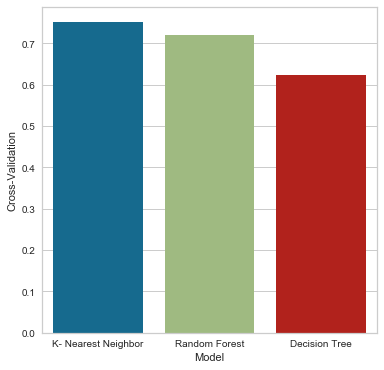

In [38]:
#plot a comparison of these models based on cv score
models_scores.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(6,6))
sns.barplot(x='Model', y='Cross-Validation', data=models_scores, ax = axe)
axe.set_xlabel('Model')
axe.set_ylabel('Cross-Validation')

plt.show()

<Figure size 72x72 with 0 Axes>

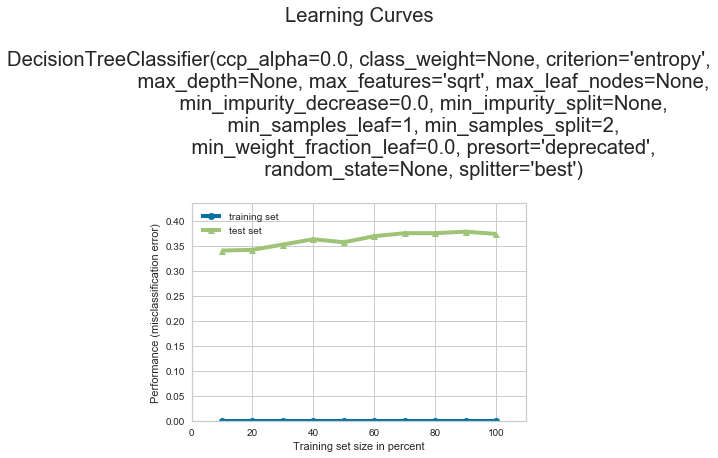

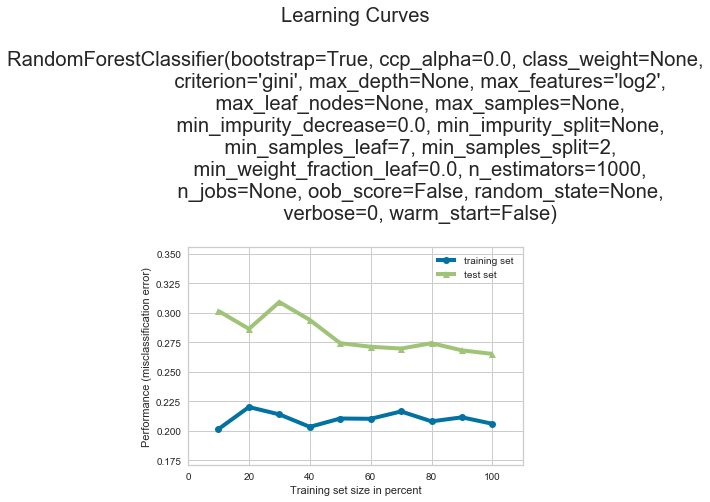

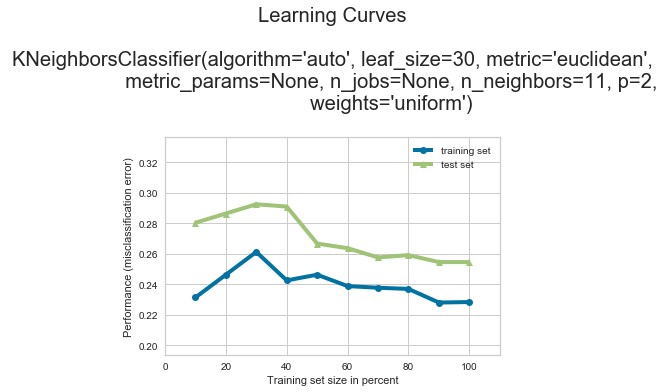

In [39]:
#plotting learning curves of the 3 models 
plt.figure(figsize=(1,1))
plt.subplots()
plot_learning_curves(Xtrain, ytrain, Xtest, ytest, tree)

plt.subplots() 
plot_learning_curves(Xtrain, ytrain, Xtest, ytest, rf)

plt.subplots()
plot_learning_curves(Xtrain, ytrain, Xtest, ytest, knn)

plt.show()

From the above learning curves it looks like decision tree and random forest are suffering from a high variance problem where both of their in sample errors are low while the out sample error is a bit too high especially in decision tree.

confusion matrix of tree:


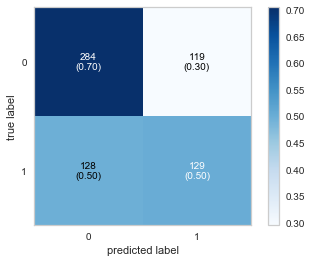

confusion matrix of rf:


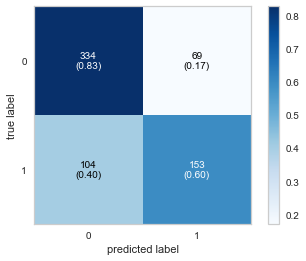

confusion matrix of knn:


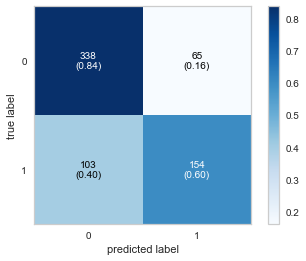

In [41]:
#plotting confusion matrices
print('confusion matrix of tree:')
plot_confusion_matrix(conf_mat=confusion_dt,show_absolute=True, show_normed=True,
                                colorbar=True)
plt.show()

print('confusion matrix of rf:')
plot_confusion_matrix(conf_mat=confusion_rf,show_absolute=True, show_normed=True,
                                colorbar=True)
plt.show()

print('confusion matrix of knn:')
plot_confusion_matrix(conf_mat=confusion_knn,show_absolute=True, show_normed=True,
                                colorbar=True)
plt.show()

Decision Tree


D:\School\python\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


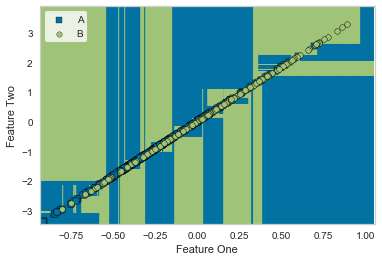

Random Forest


D:\School\python\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


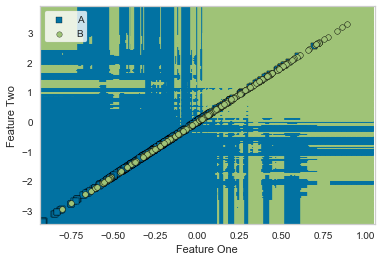

Nearest Neighbors


D:\School\python\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


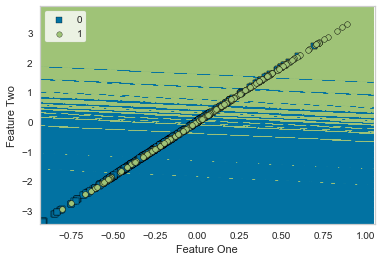

In [42]:
#plotting decision boundary of dt
print("Decision Tree")
viz1 = DecisionViz(tree)
viz1.fit(Xtrain, ytrain)
viz1.draw(Xtest, ytest)
viz1.show()
#plotting decision boundary of rf
print("Random Forest")
viz2 = DecisionViz(rf)
viz2.fit(Xtrain, ytrain)
viz2.draw(Xtest, ytest)
viz2.show()
#plotting decision boundary of knn
print("Nearest Neighbors")
viz3 = DecisionViz(knn)
viz3.fit(Xtrain, ytrain)
viz3.draw(Xtest, ytest)
viz3.show()

We can see that adding a redundant feature has severely worsened the tree models performance. It probably messed up the feature importance and so the models used the features randomly and interchangeably for splits. Moreover, adding noise and class imbalance worsened all of the models. Although, Knn seems to tolerate this a bit better where its accuracy score on the test set was slightly higher than random forest and its cross validation result was better than the other two models. However, the decision boundary of knn looks a bit weird as if it is overfitting the data as well as the other models.

# Summary
The breast cancer data used here is not noisy but it has slight class imbalance. The three models used were Decision trees, random forest and k-nearest neighbors where the first one performed good but the other two showed some great results. Feature selection was clearly significant where we could select only 10 out of the 30 features, and these 10 were the most informative ones. The accuracy of random forest after feature selection has increased by around 0.01. Furthermore, tuning the parameters of the models played an important role to increase their accuracies. However, sometimes it could end up with the model overfitting. On both datasets Decision tree seemed to be overfitting the data while only on the noisy synthetic data the 3 models seemed to be overfitting, however, we could observe that the 3 models performed above the average, although none of them could get a higher performance score than 75% which is not too bad given the class imbalance and that there was only one informative feaure. 